In [1]:
!git clone https://github.com/vsriramv/Truth_is_Universal.git

Cloning into 'Truth_is_Universal'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 182 (delta 40), reused 17 (delta 17), pack-reused 116 (from 1)
Receiving objects: 100% (182/182), 7.59 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [2]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from huggingface_hub import login

HF_TOKEN = "<add yours>"

login(token=HF_TOKEN)

model_name = "google/gemma-2-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name, token=HF_TOKEN)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    token=HF_TOKEN
)

def format_prompt(user_message: str) -> str:
    return f"<start_of_turn>user\n{user_message}<end_of_turn>\n<start_of_turn>model\n"

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

2025-07-11 04:04:12.749254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752206652.983938      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752206653.051574      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Device set to use cuda:0


In [3]:
prompt = format_prompt("statement: Nothing is everything. True or False? Answer:")
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7
              )
response = outputs[0]["generated_text"].split("<start_of_turn>model\n")[-1].strip()
print(response)

The statement "Nothing is everything" is **philosophically complex and open to debate**. Here's why:

**Arguments for "True":**

* **Existentialism:**  Some existentialist philosophers believe existence precedes essence, meaning we are born into a state of "nothingness" and define ourselves through our actions and choices.
* **Void and Ultimate Reality:** Certain spiritual or religious traditions see "nothing" as the ultimate reality, a source from which everything emanates. In Eastern philosophies, for example, "void" (shunyata) is a fundamental concept.
* **Potentialism:**  This philosophical perspective suggests that everything has the potential for existence.  Therefore, "nothing" could be seen as the ultimate potential.

**Arguments against "True":**

* **The Nature of "Nothing":** "Nothing" is a concept we grapple with. It's difficult to define, and even if we could, it wouldn't necessarily imply everything.
* **Subjective Reality:** What we perceive as "nothing" might be someone

In [4]:
!pip install -q huggingface_hub git-lfs

from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="google/gemma-2-2b-it",
    local_dir="./gemma-2-2b-it",
    token="<add yours>",  
    local_dir_use_symlinks=False
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

'/kaggle/working/gemma-2-2b-it'

In [5]:
%cd /kaggle/working/Truth_is_Universal

/kaggle/working/Truth_is_Universal


In [6]:
with open("/kaggle/working/Truth_is_Universal/config.ini","w") as f:
    f.write("""[Gemma2]
weights_directory = /kaggle/working/
2B_chat_subdir = gemma-2-2b-it""")

In [7]:
%cat config.ini

[Gemma2]
weights_directory = /kaggle/working/
2B_chat_subdir = gemma-2-2b-it

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
#!grep -A 5 "class Hook" /kaggle/working/Truth_is_Universal/utils.py

In [8]:
%cd /kaggle/working/Truth_is_Universal

/kaggle/working/Truth_is_Universal


In [ ]:
#!python generate_attn_acts.py --model_family Gemma2 --model_size 2B --model_type chat --layers -1 --datasets all_topic_specific --device cuda:0


In [ ]:
#!zip -r /kaggle/working/activations_52_layer_new_prompt.zip /kaggle/working/Truth_is_Universal/acts

In [9]:
%cp -r /kaggle/input/activations-zip/kaggle/working/Truth_is_Universal/acts /kaggle/working/Truth_is_Universal/acts

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
#%cp -r /kaggle/input/activations-new-pf/kaggle/working/Truth_is_Universal/acts /kaggle/working/Truth_is_Universal/acts

In [ ]:
#%rm -rf /kaggle/working/Truth_is_Universal/acts

In [ ]:
'''import os

# Paste your actual username and key here:
os.environ["KAGGLE_USERNAME"] = "sharankeshavs"
os.environ["KAGGLE_KEY"] = "22e318c6eb8d6363c54d6a874d089340"''' #please dont steal this or the hf key:(

In [ ]:
#!kaggle kernels output sharankeshavs/viveka-truth-is-universal-trial2/ -p /kaggle/working/

In [ ]:
 #%ls

In [10]:
statement = "The city of Sulaymaniyah is in Turkey."
prompt    = f"{statement} Is this statement T/F?"

In [11]:
from IPython.display import Markdown, display

In [12]:
import torch
import pandas as pd

# ── ASSUME model & tokenizer are already defined and on the correct device ─────
device = next(model.parameters()).device

# ── PARAMETERS ─────────────────────────────────────────────────────────────────
#statement = "The city of Krasnodar is not in Russia."
#statement = "What is donald trump's grandson's birthday?"
prompt = (
    "<start_of_turn>user\n"
    f"{statement}\n"
    "<end_of_turn>\n"
    "<start_of_turn>model\n"
)
max_steps = 50  # maximum tokens to generate

# ── TOKENIZE PROMPT ─────────────────────────────────────────────────────────────
enc = tokenizer(prompt, return_tensors="pt").to(device)
input_ids = enc.input_ids
attention = enc.attention_mask

# ── PREPARE UNEMBED + OPTIONAL BIAS ─────────────────────────────────────────────
unembed = model.lm_head.weight.data.cpu()  # (vocab_size, d_model)
bias_vec = (
    model.lm_head.bias.data.cpu()
    if model.lm_head.bias is not None
    else torch.zeros(unembed.size(0))
)

# ── DETERMINE LAYER COUNT ───────────────────────────────────────────────────────
num_layers = (
    len(model.config.hidden_sizes) + 1
    if hasattr(model.config, "hidden_sizes")
    else model.config.num_hidden_layers + 1
)
layer_headers = [f"L{L}" for L in range(num_layers)]

# ── GENERATION + RECORDING ─────────────────────────────────────────────────────
records = []
generated_tokens = []

for step in range(max_steps):
    out = model(
        input_ids=input_ids,
        attention_mask=attention,
        output_hidden_states=True,
        use_cache=False
    )

    # Get greedy token prediction at each layer
    layer_tokens = []
    for h in out.hidden_states:
        h_last = h[0, -1, :].cpu()  # (d_model,)
        logits = (h_last @ unembed.T) + bias_vec  # (vocab_size,)
        top_id = logits.argmax().item()
        layer_tokens.append(tokenizer.decode([top_id]))

    # Model's actual greedy output
    full_logits = out.logits[0, -1, :].cpu()
    next_id = full_logits.argmax().item()
    next_tok = tokenizer.decode([next_id])

    # Record step
    row = {"step": step, "token": next_tok}
    row.update({layer_headers[i]: layer_tokens[i] for i in range(num_layers)})
    records.append(row)

    # Accumulate generated tokens
    generated_tokens.append(next_tok)

    # Stop if EOS token is generated
    if next_id == tokenizer.eos_token_id:
        break

    # Update input for next step
    new_id = torch.tensor([[next_id]], device=device)
    input_ids = torch.cat([input_ids, new_id], dim=1)
    attention = torch.cat([attention, torch.ones_like(new_id)], dim=1)

# ── FINAL OUTPUT ────────────────────────────────────────────────────────────────
df = pd.DataFrame(records)
full_answer = "".join(generated_tokens).strip()

# Output
print(df)
print("\nFull generated answer:\n", Markdown(full_answer))


    step          token          L0          L1          L2       L3       L4  \
0      0           That          \n          \n       <bos>    <bos>    <bos>   
1      1      statement        That        That       <bos>     That    <bos>   
2      2             is   statement   statement   statement    <bos>    <bos>   
3      3      incorrect          is          is       <bos>       is    <bos>   
4      4              .   incorrect   incorrect       <bos>    <bos>    <bos>   
5      5                          .           .       <bos>    <bos>    <bos>   
6      6           \n\n                                                 <bos>   
7      7             Su        \n\n        \n\n       <bos>    <bos>    <bos>   
8      8            lay          Su          Su          Su       Su    <bos>   
9      9           mani         lay         lay         lay      lay      lay   
10    10            yah        mani        mani        mani     mani     mani   
11    11             is     

In [13]:
print(f"Full Answer  : \n{full_answer}")

Full Answer  : 
That statement is incorrect. 

Sulaymaniyah is a city in **Iraq**, not Turkey. 
<end_of_turn><eos>


In [15]:
#pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [16]:
df

,step,token,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20,L21,L22,L23,L24,L25,L26
0,0,That,\n,\n,<bos>,<bos>,<bos>,<bos>,<bos>,<bos>,\n\n,\n\n,\n\n,sauvages,pleaſure,ⓧ,ⓧ,ⓧ,pleaſure,purpoſe,incorrect,incorrect,incorrect,incorrect,That,that,that,This,That
1,1,statement,That,That,<bos>,That,<bos>,That,<bos>,That,That,That,That,Theſe,Theſe,^(@),That,That,purpoſe,incorrect,incorrect,incorrect,incorrect,incorrect,statement,is,is,',statement
2,2,is,statement,statement,statement,<bos>,<bos>,<bos>,<bos>,statement,statement,itſelf,itſelf,Efq,myſelf,myſelf,pleaſure,purpoſe,purpoſe,itſelf,incorrect,incorrect,incorrect,is,is,is,is,is,is
3,3,incorrect,is,is,<bos>,is,<bos>,is,<bos>,is,is,is,is,is,is,very,very,very,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect,incorrect
4,4,.,incorrect,incorrect,<bos>,<bos>,<bos>,<bos>,incorrect,incorrect,incorrect,incorrect,incorrect,Monfieur,incorrect,Monfieur,incorrect,incorrect,pleaſure,pleaſure,religieuses,.,.,.,.,.,.,.,.
5,5,,.,.,<bos>,<bos>,<bos>,<bos>,<bos>,.,.,religieuses,Theſe,Theſe,Theſe,pleaſure,purpoſe,purpoſe,purpoſe,purpoſe,suivants,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,,
6,6,\n\n,,,,,<bos>,the,<bos>,,,,automatiques,Jefus,Jefus,Jefus,Jefus,Jefus,Jefus,purpoſe,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
7,7,Su,\n\n,\n\n,<bos>,<bos>,<bos>,<bos>,<bos>,\n\n,\n\n,\n\n,\n\n,\n\n,Theſe,reaſon,reaſon,reaſon,purpoſe,purpoſe,suivants,The,The,The,The,The,The,The,Su
8,8,lay,Su,Su,Su,Su,<bos>,<bos>,<bos>,Su,pleaſure,Jefus,Jefus,Jefus,Jefus,purpoſe,purpoſe,purpoſe,pleaſure,pleaſure,Majefty,Majefty,maternity,passenger,maternity,family,lay,lay,lay
9,9,mani,lay,lay,lay,lay,lay,lay,<bos>,RenderAtEndOf,يتيمه,يتيمه,Jefus,Jefus,Jefus,Efq,Efq,pleaſure,pleaſure,pleaſure,sorrow,sorrow,urinary,health,city,city,city,-,mani


In [17]:
df.iloc[0]

step              0
token          That
L0               \n
L1               \n
L2            <bos>
L3            <bos>
L4            <bos>
L5            <bos>
L6            <bos>
L7            <bos>
L8             \n\n
L9             \n\n
L10            \n\n
L11        sauvages
L12        pleaſure
L13               ⓧ
L14               ⓧ
L15               ⓧ
L16        pleaſure
L17         purpoſe
L18       incorrect
L19       incorrect
L20       incorrect
L21       incorrect
L22            That
L23            that
L24            that
L25            This
L26            That
Name: 0, dtype: object

In [25]:
%cd /kaggle/working/Truth_is_Universal/

/kaggle/working/Truth_is_Universal


In [32]:
import os
import torch as t
dataset = "cities"
activation_dir = f"acts/Gemma2/2B/chat/{dataset}"
example_index = 425 #putting 426 gives me 427th ex, or 428th row
batch_size = 25

batch_start = (example_index // batch_size) * batch_size
offset_in_batch = example_index % batch_size

layer_vectors = []

for layer_idx in range(26):
    file_path = os.path.join(activation_dir, f"layer_{layer_idx}_{batch_start}.pt")
    if not os.path.exists(file_path):
        print(f"Missing file: {file_path}")
        continue
    
    acts = t.load(file_path)
    vector = acts[offset_in_batch]  # shape: [hidden_dim]
    layer_vectors.append(vector.cpu().numpy())  # convert to numpy if needed

print(f"Collected {len(layer_vectors)} layer vectors for example {example_index}")
df_data = pd.read_csv(f"/kaggle/working/Truth_is_Universal/datasets/{dataset}.csv")
print(f"Example : cities/{example_index}/{df_data.iloc[example_index]}")

Collected 26 layer vectors for example 425
Example : cities/425/statement          The city of Sulaymaniyah is in Turkey.
label                                                   0
city                                         Sulaymaniyah
country                                            Turkey
correct_country                                      Iraq
Name: 425, dtype: object


(26, 2304)


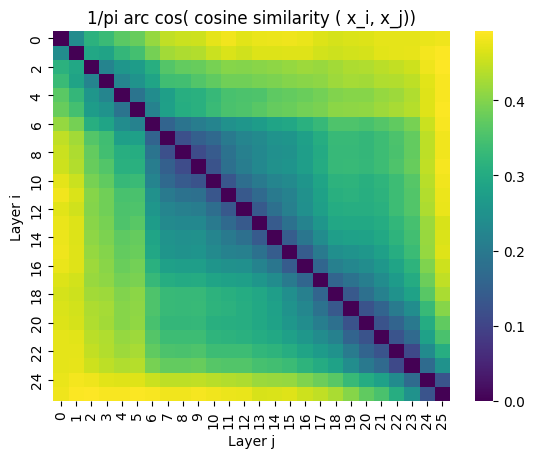

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi
layer_vectors = np.array(layer_vectors)
print(layer_vectors.shape)

n = 26
def get_similarity_heatmap(layer_vectors):
    normed = layer_vectors / np.linalg.norm(layer_vectors, axis=1, keepdims=True)
    sim_matrix = normed @ normed.T  
    sim_matrix = np.clip(sim_matrix, -1.0, 1.0)
    heatmap_values = np.arccos(sim_matrix)*1/pi
    return heatmap_values

sns.heatmap(get_similarity_heatmap(layer_vectors), cmap='viridis')
plt.title("1/pi arc cos( cosine similarity ( x_i, x_j))")
plt.xlabel("Layer j")
plt.ylabel("Layer i")
plt.show()

In [ ]:
print(tokenizer(" True",  add_special_tokens=False).input_ids)
print(tokenizer("False", add_special_tokens=False).input_ids)

# 2) Convert back to tokens to confirm:
for tid in tokenizer(" True", add_special_tokens=False).input_ids:
    print(tid, tokenizer.convert_ids_to_tokens(tid))
for tid in tokenizer("False", add_special_tokens=False).input_ids:
    print(tid, tokenizer.convert_ids_to_tokens(tid))

In [ ]:
import torch 
import numpy as np
from utils import DataManager, dataset_sizes, collect_training_data, compute_statistics
from probes import learn_truth_directions
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.metrics import roc_auc_score

In [ ]:
# hyperparameters
model_family = 'Gemma2' # options are 'Llama3', 'Llama2', 'Gemma', 'Gemma2' or 'Mistral'
model_size = '2B'
model_type = 'chat' # options are 'chat' or 'base'
layer = 19 # layer from which to extract activations

# define datasets used for training
# the ordering [affirmative_dataset1, negated_dataset1, affirmative_dataset2, negated_dataset2, ...] is required by some functions
train_sets = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans", "inventors", "neg_inventors", "animal_class", "neg_animal_class", "element_symb", "neg_element_symb", "facts", "neg_facts"]
# get size of each training dataset to include an equal number of statements from each topic in training data
train_set_sizes = dataset_sizes(train_sets) 

### Separation between true and false statements across layers

In [ ]:
# find the layer with the largest separation between true and false statements
# you need to have stored the activations in layers 1-26 for all datasets to run this cell
layers = np.arange(1, 52, 1)
datasets_separation = ['cities', 'neg_cities', 'sp_en_trans', 'neg_sp_en_trans', \
                       "inventors", "neg_inventors", "animal_class", "neg_animal_class", "element_symb"\
                       ,"neg_element_symb", "facts", "neg_facts"]
list_coords = {}
for dataset in datasets_separation:
    between_class_variances = []
    within_class_variances = []
    for layer_nr in layers:
        dm = DataManager() 
        dm.add_dataset(dataset, model_family, model_size, model_type,
                        layer_nr, split=None, center=False, device='cpu')
        acts, labels = dm.data[dataset]
        # Calculate means for each class
        false_stmnt_ids = labels == 0
        true_stmnt_ids = labels == 1

        false_acts = acts[false_stmnt_ids]
        true_acts = acts[true_stmnt_ids]

        mean_false = false_acts.mean(dim=0)
        mean_true = true_acts.mean(dim=0)

        # Calculate within-class variance
        within_class_variance_false = false_acts.var(dim=0).mean()
        within_class_variance_true = true_acts.var(dim=0).mean()
        within_class_variances.append((within_class_variance_false + within_class_variance_true).item() / 2)

        # Calculate between-class variance
        overall_mean = acts.mean(dim=0)
        between_class_variances.append(((mean_false - overall_mean).pow(2) 
                                        + (mean_true - overall_mean).pow(2)).mean().item() / 2)

    plt.plot(layers, np.array(between_class_variances) / np.array(within_class_variances), label=dataset)
    list_coords[dataset] = (list(layers), list(np.array(between_class_variances) / np.array(within_class_variances)))
plt.legend(fontsize=10)
plt.figure_size(10, 20)
plt.xticks(np.arange(0,51,1))
plt.ylabel('Between class variance /\nwithin-class variance', fontsize=10)
plt.xlabel('Layer', fontsize=10)
plt.title('Separation between true and false\nstatements across layers', fontsize=10)
plt.grid(True)

In [ ]:
'''print(list_coords['cities'])
grouped_dict = {}
for i in range(len(list_coords.keys())):
    grouped_dict[list_coords[i]] = [grouped]'''

### Supervised learning of the truth directions and classification accuracies

In [ ]:
file_path = "/kaggle/working/Truth_is_Universal/utils.py"

with open(file_path, "r") as f:
    for i, line in enumerate(f):
        if 0 <= i <= 150:
            try:
                print(f"{i+1}: {line.rstrip()}")
            except:
                break

In [ ]:
layer = 1

In [ ]:
nr_runs = 15
results = {'t_g': defaultdict(list), 't_p': defaultdict(list), 'd_{LR}': defaultdict(list)}

for _ in range(nr_runs):
    for i in range(0, len(train_sets), 2):
        # leave one dataset out (affirmative + negated)
        cv_train_sets = [set for j, set in enumerate(train_sets) if j not in (i, i+1)]
        
        # Collect training data
        acts_centered, _, labels, polarities = collect_training_data(cv_train_sets, train_set_sizes, model_family,
                                                          model_size, model_type, layer)
        
        # Fit model
        t_g, t_p = learn_truth_directions(acts_centered, labels, polarities)

        # fit LR for comparison
        LR = LogisticRegression(penalty=None, fit_intercept=False)
        LR.fit(acts_centered.numpy(), labels.numpy())
        d_lr = torch.from_numpy(LR.coef_[0]).float()
                
        # Evaluate on held-out sets, assuming affirmative and negated dataset on the same topic are at index i and i+1
        for j in range(2):
            dataset = train_sets[i+j]
            dm = DataManager()
            dm.add_dataset(dataset, model_family, model_size, model_type, layer, split=None, center=False, device='cpu')
            acts, labels = dm.get(dataset)

            auroc = roc_auc_score(labels.numpy(), (acts @ t_g).numpy())
            results['t_g'][dataset].append(auroc)
            auroc = roc_auc_score(labels.numpy(), (acts @ t_p).numpy())
            results['t_p'][dataset].append(auroc)
            auroc = roc_auc_score(labels.numpy(), (acts @ d_lr).numpy())
            results['d_{LR}'][dataset].append(auroc)

stat_results = compute_statistics(results)

In [ ]:
# Create a custom colormap from red to yellow
cmap = LinearSegmentedColormap.from_list('red_yellow', [(1, 0, 0), (1, 1, 0)], N=100)

# Create three subplots side-by-side
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(3.5, 6), ncols=3)

for ax, key in zip((ax1, ax2, ax3), ('t_g', 't_p', 'd_{LR}')):
    grid = [[stat_results[key]['mean'][dataset]] for dataset in train_sets]
    im = ax.imshow(grid, vmin=0, vmax=1, cmap=cmap)
    
    ax.set_aspect('auto')
    ax.set_aspect(0.6)
    
    for i, row in enumerate(grid):
        for j, val in enumerate(row):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=13)
    
    ax.set_yticks(range(len(train_sets)))
    ax.set_xticks([])
    ax.set_title(f"${key}$", fontsize=14)

ax1.set_yticklabels(train_sets, fontsize=13)
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Adjust the layout to make room for the colorbar
plt.subplots_adjust(top=0.9, bottom=0.05, left=0.1, right=0.9, wspace=0.4)

# Add colorbar with a specified position
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=13)

fig.suptitle("AUROC", fontsize=15)
plt.show()

### Activation vectors projected onto 2d truth subspace

In [ ]:
# Compute t_g and t_p using all data
acts_centered, _, labels, polarities = collect_training_data(train_sets, train_set_sizes, model_family, 
                                                    model_size, model_type, layer)
t_g, t_p = learn_truth_directions(acts_centered, labels, polarities)

# define helper functions for plotting
def collect_affirm_neg_data(train_sets, train_set_sizes, model_family, model_size, model_type, layer):
    dm_affirm, dm_neg = DataManager(), DataManager()
    for dataset_name in train_sets:
        split = min(train_set_sizes.values()) / train_set_sizes[dataset_name]
        if 'neg_' not in dataset_name:
            dm_affirm.add_dataset(dataset_name, model_family, model_size, model_type, layer, split=split, center=False, device='cpu')
        else:
            dm_neg.add_dataset(dataset_name, model_family, model_size, model_type, layer, split=split, center=False, device='cpu')
    return dm_affirm.get('train') + dm_neg.get('train')

def compute_t_affirm(acts_affirm, labels_affirm):
    LR = LogisticRegression(penalty=None, fit_intercept=True)
    LR.fit(acts_affirm.numpy(), labels_affirm.numpy())
    return LR.coef_[0] / np.linalg.norm(LR.coef_[0])

def compute_orthonormal_vectors(t_g, t_p):
    t_g_numpy = t_g.numpy()
    t_p_numpy = t_p.numpy()
    projection = np.dot(t_p_numpy, t_g_numpy) / np.dot(t_g_numpy, t_g_numpy) * t_g_numpy
    t_p_orthonormal = (t_p_numpy - projection) / np.linalg.norm(t_p_numpy - projection)
    t_g_orthonormal = t_g_numpy / np.linalg.norm(t_g_numpy)
    return t_g_orthonormal, t_p_orthonormal

def project_activations(acts, t_g, t_p):
    return t_g @ acts.numpy().T, t_p @ acts.numpy().T

def plot_vector(ax, vector, t_g_orthonormal, t_p_orthonormal, label, midpoint):
    # Normalize input vector
    vector_normalized = vector / np.linalg.norm(vector)
    
    # Compute vector_subspace
    vector_subspace = np.array([(np.dot(t_g_orthonormal, vector_normalized)), 
                                (np.dot(t_p_orthonormal, vector_normalized))])

    vector_subspace = vector_subspace / np.linalg.norm(vector_subspace)
    
    # Get current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Compute scale based on axis limits
    axis_range = max(xlim[1] - xlim[0], ylim[1] - ylim[0])
    scale = 0.4 * axis_range  # Adjust this factor to change the relative size of the vector
    
    # Compute arrow head position
    arrow_head = np.array(midpoint) + scale * vector_subspace
    
    # Compute label offset based on axis limits
    label_offset = np.array([0.03 * (xlim[1] - xlim[0]), 0.03 * (ylim[1] - ylim[0])])
    
    # Adjust label position to avoid overlap with arrow
    label_position = arrow_head + label_offset * np.sign(vector_subspace)
    
    # Plot the vector
    ax.quiver(*midpoint, *(scale * vector_subspace), 
              color='green', angles='xy', scale_units='xy', scale=1, 
              width=0.03)
    
    # Add label
    ax.annotate(label, xy=label_position, fontsize=21, 
                ha='center', va='center')

# Update the plot_scatter function to use the new plot_vector function
def plot_scatter(ax, proj_g, proj_p, labels, proj_g_other, proj_p_other, labels_other,
                  title, plot_t_a=False, plot_t_g_t_p=False, **kwargs):
    label_to_color = {0: 'indigo', 1: 'orange'}
    label_to_marker = {0: 's', 1: '^'}

    for label in [0, 1]:
        idx = labels.numpy() == label
        ax.scatter(proj_g[idx], proj_p[idx], c=label_to_color[label], marker=label_to_marker[label], alpha=0.5, s=5)
        idx_other = labels_other.numpy() == label
        if title == "Affirmative & Negated\nStatements":
            ax.scatter(proj_g_other[idx_other], proj_p_other[idx_other], c=label_to_color[label],
                        marker=label_to_marker[label], alpha=0.5, s=5)
        else:
            ax.scatter(proj_g_other[idx_other], proj_p_other[idx_other], c='grey', marker=label_to_marker[label], alpha=0.1, s=5)

    # Compute midpoint based on current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    midpoint = (0.5 * (xlim[0] + xlim[1]), 0.5 * (ylim[0] + ylim[1]))

    if plot_t_a:
        plot_vector(ax, kwargs['t_affirm'], kwargs['t_g_orthonormal'], kwargs['t_p_orthonormal'], "$t_A$", midpoint)
    if plot_t_g_t_p:
        plot_vector(ax, kwargs['t_g'], kwargs['t_g_orthonormal'], kwargs['t_p_orthonormal'], "$t_G$", midpoint)
        plot_vector(ax, kwargs['t_p'], kwargs['t_g_orthonormal'], kwargs['t_p_orthonormal'], "$t_P$", midpoint)

    ax.set_title(title, fontsize=19)
    #ax.set_yticks([])
    #ax.set_xticks([])

    # Update axis limits after plotting
    ax.autoscale()
    ax.set_aspect('equal')

def add_legend(ax):
    handles = [plt.scatter([], [], c='indigo', marker='s', label='False'),
               plt.scatter([], [], c='orange', marker='^', label='True')]
    ax.legend(handles=handles, fontsize=18)

def plot_density(ax, acts, labels, t, xlabel):
    # Convert inputs to NumPy arrays if they're PyTorch tensors
    if isinstance(acts, torch.Tensor):
        acts = acts.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()
    if isinstance(t, torch.Tensor):
        t = t.detach().cpu().numpy()

    # Compute projections
    if t.ndim == 1:
        proj = t @ acts.T
    else:
        proj = t.reshape(1, -1) @ acts.T
    
    # Compute axis limits based on projected activations
    x_min, x_max = np.min(proj), np.max(proj)
    x_range = x_max - x_min
    x_padding = 0.1 * x_range  # Add 10% padding on each side
    xlim = (x_min - x_padding, x_max + x_padding)
    
    # Set x-axis limits
    ax.set_xlim(xlim)
    
    # Compute KDE for each label
    x_grid = np.linspace(xlim[0], xlim[1], 400)
    for label, color in zip([0, 1], ['indigo', 'orange']):
        data = proj[labels == label]
        kde = gaussian_kde(data)
        density = kde(x_grid)
        density /= np.trapz(density, x_grid)
        ax.plot(x_grid, density, color=color)

    # Plot scatter points
    y_scatter = np.ones(np.shape(proj)) * (-0.05)
    colors = ['indigo' if label == 0 else 'orange' for label in labels]
    ax.scatter(proj, y_scatter, c=colors, alpha=0.3, s=10)
    
    # Set y-axis limits to accommodate both KDE and scatter points
    y_max = ax.get_ylim()[1]
    ax.set_ylim(-0.1, y_max * 1.1)  # Extend y-axis slightly above the maximum KDE value

     # Calculate AUROC
    auroc = calculate_auroc(acts, labels, t)
    
    # Display AUROC in the top left corner
    ax.text(0.05, 0.95, f'AUROC: {auroc:.2f}', transform=ax.transAxes, 
            verticalalignment='top', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))
    
    # Set labels and remove ticks
    ax.set_ylabel('Frequency', fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.set_yticks([])
    ax.set_xticks([])

    # Add a light grid
    ax.grid(True, linestyle='--', alpha=0.3)

def calculate_auroc(acts, labels, t):
    if isinstance(acts, torch.Tensor):
        acts = acts.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()
    if isinstance(t, torch.Tensor):
        t = t.detach().cpu().numpy()
    
    proj = t @ acts.T
    auroc = roc_auc_score(labels, proj)
    return auroc

#### Figure 1

In [ ]:
fig = plt.figure(figsize=(11.5, 11))
axes = [
    fig.add_axes([0.4, 0.4, 0.26, 0.26]),  # ax1: top center
    fig.add_axes([0.7, 0.4, 0.26, 0.26]),  # ax2: top right
    fig.add_axes([0.1, 0.4, 0.26, 0.26]),  # ax3: top left
    fig.add_axes([0.58, 0.1, 0.25, 0.25]), # ax4: bottom right
    fig.add_axes([0.23, 0.1, 0.25, 0.25])  # ax5: bottom left
]

# Collect activations and labels of affirmative and negated statements separately
acts_affirm, labels_affirm, acts_neg, labels_neg = collect_affirm_neg_data(train_sets, train_set_sizes,
                                                                            model_family, model_size, model_type, layer)

# Compute t_affirm
t_affirm = compute_t_affirm(acts_affirm, labels_affirm)

# orthonormalise t_g and t_p
t_g_orthonormal, t_p_orthonormal = compute_orthonormal_vectors(t_g, t_p)

# Project activations
proj_g_affirm, proj_p_affirm = project_activations(acts_affirm, t_g_orthonormal, t_p_orthonormal)
proj_g_neg, proj_p_neg = project_activations(acts_neg, t_g_orthonormal, t_p_orthonormal)

# Plot scatter plots
plot_scatter(axes[0], proj_g_affirm, proj_p_affirm, labels_affirm,
              proj_g_neg, proj_p_neg, labels_neg, 'Affirmative Statements', plot_t_a=True,
                t_affirm=t_affirm, t_g_orthonormal=t_g_orthonormal, t_p_orthonormal=t_p_orthonormal)
plot_scatter(axes[1], proj_g_neg, proj_p_neg, labels_neg, proj_g_affirm,
              proj_p_affirm, labels_affirm, 'Negated Statements')
plot_scatter(axes[2], proj_g_affirm, proj_p_affirm, labels_affirm,
              proj_g_neg, proj_p_neg, labels_neg, 'Affirmative & Negated\nStatements', plot_t_g_t_p=True,
                t_g=t_g, t_p=t_p, t_g_orthonormal=t_g_orthonormal, t_p_orthonormal=t_p_orthonormal)

# Add legend
add_legend(axes[2])

# Plot density plots
acts = torch.cat((acts_affirm, acts_neg), dim=0)
labels = torch.cat((labels_affirm, labels_neg))
plot_density(axes[3], acts, labels, t_affirm, '$a^T t_A$')
plot_density(axes[4], acts, labels, t_g, '$a^T t_G$')

plt.show()
print(f"layer {layer}")

#### Activation vectors projected onto $t_G$ and $t_P$ (reduced version of figure 1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
acts_affirm, labels_affirm, acts_neg, labels_neg = collect_affirm_neg_data(train_sets, train_set_sizes, 
                                                                            model_family, model_size, 
                                                                            model_type, layer)

for i, (acts, labels) in enumerate([(acts_affirm, labels_affirm), (acts_neg, labels_neg)]):
    prod_g, prod_p = project_activations(acts, t_g, t_p)
    ax = axes[i]
    if i==0:
        ax.set_xlabel('$a_{ij}^T t_G$', fontsize=19)
        ax.set_ylabel('$a_{ij}^T t_P$', fontsize=19)
        ax.set_title('Affirmative Statements', fontsize=19)
    else:
        ax.set_title('Negated Statements', fontsize=19)

    colors = ['red' if label == 0 else 'blue' for label in labels]
    ax.scatter(prod_g, prod_p, c=colors, alpha=0.5, s=5)

# Add the legend to the last subplot
handles = [plt.scatter([], [], c='red', label='False'),
            plt.scatter([], [], c='blue', label='True')]
axes[1].legend(handles=handles, fontsize=19)

fig.suptitle('Projection of activations on $t_G$ and $t_P$', fontsize=19)
plt.show()
print(f"layer {layer}")

#### Projection of other datasets onto $t_G$ and $t_P$ - larger_than and smaller_than are shown as examples

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  

acts_affirm, labels_affirm, acts_neg, labels_neg = collect_affirm_neg_data(train_sets, train_set_sizes, model_family,
                                                                            model_size, model_type, layer)
# Project activations on t_g and t_p
proj_g_affirm, proj_p_affirm = project_activations(acts_affirm, t_g, t_p)
proj_g_neg, proj_p_neg = project_activations(acts_neg, t_g, t_p)

# Define colors and markers for each label
label_to_color = {0: 'indigo', 1: 'orange'}
label_to_marker = {0: 's', 1: '^'}  # s for square, ^ for triangle

for i, dataset_name in enumerate(['larger_than', 'smaller_than']):
        ax = axes[i]
        ax.set_title(dataset_name, fontsize=19)
        for label in [0,1]:
                idx = labels_affirm.numpy() == label
                ax.scatter(proj_g_affirm[idx], proj_p_affirm[idx], c='grey', 
                        marker=label_to_marker[label], alpha=0.3, s=5) 
                idx = labels_neg.numpy() == label
                ax.scatter(proj_g_neg[idx], proj_p_neg[idx], c='grey', 
                        marker=label_to_marker[label], alpha=0.3, s=5) 
        
        dm = DataManager()
        dm.add_dataset(dataset_name, model_family, model_size, model_type, layer, split=None, center=False, device='cpu')
        acts, labels = dm.data[dataset_name]
        prod_g, prod_p = project_activations(acts, t_g, t_p)
        for label in [0,1]:
                idx = labels.numpy() == label
                ax.scatter(prod_g[idx], prod_p[idx], c=label_to_color[label], 
                        marker=label_to_marker[label], alpha=0.9, s=15)
                if i==0:
                        ax.set_xlabel('$a^T t_G$', fontsize=19)
                        ax.set_ylabel('$a^T t_P$', fontsize=19)

add_legend(axes[0])
fig.suptitle('Projection of activations on $t_G$ and $t_P$', fontsize=19)

### Dimensionality of Truth
#### Are there more than two truth dimensions?

#### Fraction of truth related variance in activations explained by Principal Components

In [ ]:
# Define the four different statement types and corresponding datasets
statement_types = ["affirmative", "affirmative, negated", "affirmative, negated, conjunctions", "affirmative, affirmative German",
                    "affirmative, affirmative German,\nnegated, negated German", 
                   "affirmative, negated,\nconjunctions, disjunctions"]
datasets_pca_options = {
    "affirmative": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts'],
    
    "affirmative, negated": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts',
                             'neg_cities', 'neg_sp_en_trans', 'neg_inventors', 'neg_animal_class', 'neg_element_symb', 'neg_facts'],

    "affirmative, negated, conjunctions": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts',
                             'neg_cities', 'neg_sp_en_trans', 'neg_inventors', 'neg_animal_class', 'neg_element_symb', 'neg_facts',
                             'cities_conj', 'sp_en_trans_conj', 'inventors_conj', 'animal_class_conj', 'element_symb_conj', 'facts_conj'],
    
    "affirmative, affirmative German": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts',
                             'cities_de', 'sp_en_trans_de', 'inventors_de', 'animal_class_de', 'element_symb_de', 'facts_de',],

    "affirmative, affirmative German,\nnegated, negated German": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts',
                            'cities_de', 'sp_en_trans_de', 'inventors_de', 'animal_class_de', 'element_symb_de', 'facts_de',
                             'neg_cities', 'neg_sp_en_trans', 'neg_inventors', 'neg_animal_class', 'neg_element_symb', 'neg_facts',
                             'neg_cities_de', 'neg_sp_en_trans_de', 'neg_inventors_de', 'neg_animal_class_de', 'neg_element_symb_de', 'neg_facts_de'],

    "affirmative, negated,\nconjunctions, disjunctions": ['cities', 'sp_en_trans', 'inventors', 'animal_class', 'element_symb', 'facts',
                             'neg_cities', 'neg_sp_en_trans', 'neg_inventors', 'neg_animal_class', 'neg_element_symb', 'neg_facts',
                             'cities_conj', 'sp_en_trans_conj', 'inventors_conj', 'animal_class_conj', 'element_symb_conj', 'facts_conj',
                             'cities_disj', 'sp_en_trans_disj', 'inventors_disj', 'animal_class_disj', 'element_symb_disj', 'facts_disj']
}

def compute_subspace_angle(A, B):
    # Normalize columns of A and B
    A = A / torch.linalg.norm(A, dim=0)
    B = B / torch.linalg.norm(B, dim=0)
    
    # Compute SVD of A^T * B
    U, S, Vt = torch.linalg.svd(A.T @ B)
    
    # Compute principal angles
    angles = torch.arccos(torch.clamp(S, -1, 1))
    
    return angles

# Create the 2x2 plot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, statement_type in enumerate(statement_types):
    datasets_pca = datasets_pca_options[statement_type]
    directions = []

    for train_set in datasets_pca:
        dm = DataManager()
        dm.add_dataset(train_set, model_family, model_size, model_type, layer, split=1.0, center=True, device='cpu')
        train_acts, train_labels = dm.get('train')
        true_acts = train_acts[train_labels.to(bool)]
        false_acts = train_acts[~train_labels.to(bool)]
        directions.append(torch.mean(true_acts, dim=0))
        directions.append(torch.mean(false_acts, dim=0))

    mean_acts = np.array([direction.numpy() for direction in directions])
    pca = PCA(n_components=10)
    pca.fit(mean_acts)
    axs[i].scatter(np.arange(1, 11, 1), pca.explained_variance_ratio_, s=90)
    axs[i].set_title(f'{statement_type}', fontsize=26)
    if i == 0 or i==3:
        axs[i].set_ylabel('Explained variance', fontsize=27)
    if i==3 or i == 4 or i==5:
        axs[i].set_xlabel('PC index', fontsize=26)
    axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[i].grid(True)
    if statement_type == "affirmative, negated":
        # Compute subspace angle
        A = torch.stack([t_g, t_p], dim=1)
        B = torch.stack([torch.tensor(pca.components_[0, :]), torch.tensor(pca.components_[1, :])], dim=1)
        angles = compute_subspace_angle(A, B)
        print(f"Principal angles between subspaces (in radians): {angles}")
        print(f"Principal angles between subspaces (in degrees): {torch.rad2deg(angles)}")
        print("Cosine similarity between t_G and first PC: " + str(torch.tensor(pca.components_[0, :])/torch.linalg.norm(torch.tensor(pca.components_[0, :])) @ t_g/np.linalg.norm(t_g)))
        print("Cosine similarity between t_P and second PC: " + str(torch.tensor(pca.components_[1, :])/torch.linalg.norm(torch.tensor(pca.components_[1, :])) @ t_p/np.linalg.norm(t_p)))

fig.suptitle('Fraction of variance in centered and averaged\n activations explained by PCs', fontsize=28)
plt.tight_layout()
plt.show()

In [ ]:
train_sets_subset = [['cities'], ['cities', 'neg_cities'], ['cities', 'neg_cities', 'cities_conj'],
                     ['cities', 'neg_cities', 'cities_conj', 'cities_disj']]

val_sets_subset = ['cities', 'neg_cities', 'facts', 'neg_facts',
                   'facts_conj', 'facts_disj']

num_runs = 10
project_options = [None, 't_G_t_P']

# Helper function to create unique keys for training sets
def get_train_set_key(train_set):
    return '_'.join(train_set)

# Initialize dictionaries to store accuracies for each projection option
all_aurocs_options = {proj: {get_train_set_key(train_set): {val_set: [] for val_set in val_sets_subset} for train_set in train_sets_subset} for proj in project_options}

for project_out in project_options:
    all_aurocs = all_aurocs_options[project_out]

    for run in range(num_runs):
        # Compute t_g and t_p using all data
        acts_centered, _, labels, polarities = collect_training_data(train_sets, train_set_sizes, model_family, 
                                                            model_size, model_type, layer)
        t_g, t_p = learn_truth_directions(acts_centered, labels, polarities)
        # orthonormalize t_g and t_p
        t_G_orthonormal, t_P_orthonormal = compute_orthonormal_vectors(t_g, t_p)

        for train_set in train_sets_subset:
            train_set_key = get_train_set_key(train_set)
            
            # set up data
            dm = DataManager()
            for subset in train_set:
                dm.add_dataset(subset, model_family, model_size, model_type, layer, split=0.8, center=True, device='cpu')
            train_acts, train_labels = dm.get('train')
            if project_out == None:
                pass
            elif project_out == 't_G_t_P':
                train_acts = train_acts - (train_acts @ t_G_orthonormal)[:, None] * t_G_orthonormal - (train_acts @ t_P_orthonormal)[:, None] * t_P_orthonormal
            polarities = torch.zeros((train_labels.shape)[0])
            # learn t_G
            t_g_trained, _ = learn_truth_directions(train_acts, train_labels, polarities)
            
            # compute auroc of a^T t_G on validation sets
            for val_set in val_sets_subset:
                if val_set in train_set:
                    acts, labels = dm.get('val')
                else:
                    dm.add_dataset(val_set, model_family, model_size, model_type, layer, split=None, center=False, device='cpu')
                    acts, labels = dm.data[val_set]
                
                proj_g = acts @ t_g_trained
                auroc = roc_auc_score(labels.numpy(), proj_g.numpy())
                all_aurocs[train_set_key][val_set].append(auroc)

    # Calculate mean and standard deviation for each training-validation set combination
    mean_aurocs = {train_set: {val_set: np.mean(accs) for val_set, accs in val_sets.items()} for train_set, val_sets in all_aurocs.items()}
    std_aurocs = {train_set: {val_set: np.std(accs) for val_set, accs in val_sets.items()} for train_set, val_sets in all_aurocs.items()}

    all_aurocs_options[project_out] = {'mean': mean_aurocs, 'std': std_aurocs}
    print(mean_aurocs, std_aurocs)

#### Generalisation accuracies of truth directions trained on different data

In [ ]:
# Plotting the results
fig, axes = plt.subplots(figsize=(16, 6.7), nrows=1, ncols=2, sharey=True)
# Titles for the x and y axes
titles_val = ['cities', 'neg_cities', 'facts', 'neg_facts',
                'facts_conj', 'facts_disj']
titles_train = ['cities', '+ neg_cities', '+ cities_conj', '+ cities_disj']

# Create a custom colormap from red to yellow
colors = [(1, 0, 0), (1, 1, 0)]  # Red to Yellow
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'red_yellow'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

for idx, project_out in enumerate(project_options):
    mean_aurocs = all_aurocs_options[project_out]['mean']
    std_aurocs = all_aurocs_options[project_out]['std']
    
    # Prepare the grid for mean accuracies
    grid = np.zeros((len(train_sets_subset), len(val_sets_subset)))

    # Populate the grid with mean accuracies
    for i, train_set in enumerate(train_sets_subset):
        train_set_key = get_train_set_key(train_set)
        for j, val_set in enumerate(val_sets_subset):
            grid[i, j] = mean_aurocs[train_set_key][val_set]

    # Plot the grid
    im = axes[idx].imshow(grid.T, vmin=0, vmax=1, cmap=cmap, aspect='auto')

    # Annotate each cell with the mean accuracy and standard deviation
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            mean_auroc = grid[i][j]
            std_auroc = std_aurocs[get_train_set_key(train_sets_subset[i])][val_sets_subset[j]]
            axes[idx].text(i, j, f'{mean_auroc:.2f}', ha='center', va='center', fontsize=16) #±{std_auroc:.2f}


    # Titles for the x and y axes
    axes[idx].set_yticks(range(len(val_sets_subset)))
    axes[idx].set_xticks(range(len(train_sets_subset)))
    axes[idx].set_yticklabels([val_title for val_title in titles_val], fontsize=17)
    axes[idx].set_xticklabels([train_title for train_title in titles_train], rotation=45, ha='right', fontsize=17)

    # Set title and labels for the subplot
    if idx == 0:
        axes[idx].set_title(f'Projected out: None', fontsize=20)
    if idx == 1:
        axes[idx].set_title(f'Projected out: $t_G$ and $t_P$', fontsize=20)
    if idx == 0:
        axes[idx].set_ylabel('Test Set', fontsize=20)
        axes[idx].set_xlabel('Train Set "cities"', fontsize=20)

# Add colorbar to the last subplot
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
cbar.ax.tick_params(labelsize=16)
fig.suptitle('AUROC for Projections $a^T t$', fontsize=20, x=0.42)

# Show the plot
plt.show()

### Cross-dataset generalization matrix

In [ ]:
train_sets_subset = [['cities'], ['neg_cities'], ['cities', 'neg_cities'], ['cities_conj'], ['cities_disj']]

val_sets_subset = ['cities', 'neg_cities', 'facts', 'neg_facts',
                   'facts_conj', 'facts_disj']

num_runs = 10

# Helper function to create unique keys for training sets
def get_train_set_key(train_set):
    return '_'.join(train_set)

# Initialize dictionaries to store accuracies for each projection option
all_aurocs = {get_train_set_key(train_set): {val_set: [] for val_set in val_sets_subset} for train_set in train_sets_subset}
for run in range(num_runs):
    for train_set in train_sets_subset:
        train_set_key = get_train_set_key(train_set)
        
        # set up data
        dm = DataManager()
        for subset in train_set:
            dm.add_dataset(subset, model_family, model_size, model_type, layer, split=0.8, center=True, device='cpu')
        train_acts, train_labels = dm.get('train')
        polarities = torch.zeros((train_labels.shape)[0])
        # learn t_G
        t_g_trained, _ = learn_truth_directions(train_acts, train_labels, polarities)
        
        # compute auroc of a^T t_G on validation sets
        for val_set in val_sets_subset:
            if val_set in train_set:
                acts, labels = dm.get('val')
            else:
                dm.add_dataset(val_set, model_family, model_size, model_type, layer, split=None, center=False, device='cpu')
                acts, labels = dm.data[val_set]
            
            proj_g = acts @ t_g_trained
            auroc = roc_auc_score(labels.numpy(), proj_g.numpy())
            all_aurocs[train_set_key][val_set].append(auroc)

# Calculate mean and standard deviation for each training-validation set combination
mean_aurocs = {train_set: {val_set: np.mean(accs) for val_set, accs in val_sets.items()} for train_set, val_sets in all_aurocs.items()}
std_aurocs = {train_set: {val_set: np.std(accs) for val_set, accs in val_sets.items()} for train_set, val_sets in all_aurocs.items()}

all_aurocs = {'mean': mean_aurocs, 'std': std_aurocs}
print(mean_aurocs, std_aurocs)

In [ ]:
# Plotting the results
fig, ax = plt.subplots(figsize=(7, 5.5), nrows=1, ncols=1, sharey=True)
# Titles for the x and y axes
titles_val = ['cities', 'neg_cities', 'facts', 'neg_facts',
                'facts_conj', 'facts_disj']
titles_train = ['cities', 'neg_cities', 'cities+neg_cities', 'cities_conj', 'cities_disj']

# Create a custom colormap from red to yellow
colors = [(1, 0, 0), (1, 1, 0)]  # Red to Yellow
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'red_yellow'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

mean_aurocs = all_aurocs['mean']
std_aurocs = all_aurocs['std']

# Prepare the grid for mean accuracies
grid = np.zeros((len(train_sets_subset), len(val_sets_subset)))

# Populate the grid with mean accuracies
for i, train_set in enumerate(train_sets_subset):
    train_set_key = get_train_set_key(train_set)
    for j, val_set in enumerate(val_sets_subset):
        grid[i, j] = mean_aurocs[train_set_key][val_set]

# Plot the grid
im = ax.imshow(grid.T, vmin=0, vmax=1, cmap=cmap, aspect='auto')

# Annotate each cell with the mean accuracy and standard deviation
for i in range(len(grid)):
    for j in range(len(grid[0])):
        mean_auroc = grid[i][j]
        std_auroc = std_aurocs[get_train_set_key(train_sets_subset[i])][val_sets_subset[j]]
        ax.text(i, j, f'{mean_auroc:.2f}', ha='center', va='center', fontsize=16) #±{std_auroc:.2f}


    # Titles for the x and y axes
    ax.set_yticks(range(len(val_sets_subset)))
    ax.set_xticks(range(len(train_sets_subset)))
    ax.set_yticklabels([val_title for val_title in titles_val], fontsize=17)
    ax.set_xticklabels([train_title for train_title in titles_train], rotation=45, ha='right', fontsize=17)

    ax.set_ylabel('Test Set', fontsize=20)
    ax.set_xlabel('Train Set', fontsize=20)

# Add colorbar to the last subplot
cbar = fig.colorbar(im, shrink=0.8)
cbar.ax.tick_params(labelsize=16)
fig.suptitle('AUROC for Projections $a^T t$', fontsize=20, x=0.42)

# Show the plot
plt.show()

In [ ]:
data = np.zeros((100,2))
# zeroth feature is perfectly predictive of label
data[0:50,0] = 1.0
# first feature is correlated with the correct label but not perfectly, 20 correct, 5 incorrect
data[0:20, 1] = 1.0
data[50:55, 1] = 1.0
labels = np.concatenate((np.ones(50), np.zeros(50)))
# which method can disentangle feature 0 from feature 1?
# mass mean
d_mm = np.mean(data[labels == 1.0], axis=0) - np.mean(data[labels==0.0], axis=0)
print(d_mm)
# LR
LR = LogisticRegression(penalty=None, fit_intercept = True)
LR.fit(data, labels)
d_LR = LR.coef_
print(LR.intercept_)
print(d_LR) 